In [82]:
# Download dataset
from torchvision.datasets import MNIST

In [83]:
np_train_dataset = MNIST('./mnist_train_np/', train=True, download=True)

In [84]:
# Start MLP implementation in numpy

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
np.random.seed(3)

In [3]:
def fetch(fp):
    with open(fp, "rb") as f:
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8).copy()

In [4]:
X_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-labels-idx1-ubyte")[8:]
X_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-labels-idx1-ubyte")[8:]

In [5]:
def normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test):
    
    # Encode output label as a one hot vector
    oneHotEncoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train = oneHotEncoder.fit_transform(Y_train.reshape(len(Y_train), -1))
    Y_test = oneHotEncoder.transform(Y_test.reshape(len(Y_test), -1))
    
    # Normalize data by diving by 255. All values are in range 0-255
    X_train = X_train / 255.
    X_test = X_test / 255.

    return X_train, Y_train, X_test, Y_test

In [6]:
X_train, Y_train, X_test, Y_test = normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test)

In [7]:
# initialize params
n = 60000
batch_size=32

In [8]:
# initialize weights
def initialize_weights():
    W1 = np.random.randn(300, 784) / np.sqrt(784)
    W2 = np.random.randn(10, 300) / np.sqrt(300)
    return W1, W2

In [9]:
costs = []
accuracies = []

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def softmax(x):
    power = np.exp(x - np.max(x))
    return power / power.sum(axis=0, keepdims=True)

In [12]:
def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
def forward(X, W1, W2):
    Z1 = W1.dot(X.T)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1)
    A2 = softmax(Z2)
    return A1, W1, Z1, A2, W2, Z2

In [14]:
def backward(X, Y, A1, W1, Z1, A2, W2, Z2):
    dZ2 = A2 - Y.T
    dW2 = dZ2.dot(A1.T) / n
    dZ1 = W2.T.dot(dZ2) * de_sigmoid(Z1)
    dW1 = dZ1.dot(X) / n
    return dW1, dW2

In [15]:
def predict(W1, W2, X, Y):
    A1, W1, Z1, A2, W2, Z2 = forward(X, W1, W2)
    y_hat = np.argmax(A2, axis=0)
    Y = np.argmax(Y, axis = 1)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [16]:
def train_model(X, Y, alpha=0.3, n_iterations=500000):
    W1, W2 = initialize_weights()
    for iteration in range(n_iterations):
        batch = np.random.choice(n, batch_size, replace=False)
        x = X[batch]
        y = Y[batch]
        A1, W1, Z1, A2, W2, Z2 = forward(x, W1, W2)
        cost = -np.mean(y*np.log(A2.T))
        dW1, dW2 = backward(x, y, A1, W1, Z1, A2, W2, Z2)
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        acc = predict(W1, W2, x, y)
        if iteration % 100 == 0:
            print("Cost: ", cost, "Train Accuracy:", acc)
        if iteration % 10 == 0:
            costs.append(cost)
            accuracies.append(acc)
    return W1, W2

In [18]:
W1, W2 = train_model(X_train, Y_train)
print("W1: ", W1)
print("W2: ", W2)

Cost:  0.24480252711659362 Train Accuracy: 12.5
Cost:  0.24449090342300633 Train Accuracy: 9.375
Cost:  0.24580835342792556 Train Accuracy: 12.5
Cost:  0.23202299555369238 Train Accuracy: 12.5
Cost:  0.23423935370591709 Train Accuracy: 18.75
Cost:  0.23808991063641166 Train Accuracy: 9.375
Cost:  0.22917803282342236 Train Accuracy: 18.75
Cost:  0.2328187649876305 Train Accuracy: 6.25
Cost:  0.22984409204702158 Train Accuracy: 9.375
Cost:  0.23361185842644017 Train Accuracy: 6.25
Cost:  0.23152226371388399 Train Accuracy: 6.25
Cost:  0.22747066576496655 Train Accuracy: 15.625
Cost:  0.2281544760039075 Train Accuracy: 15.625
Cost:  0.22831964126160093 Train Accuracy: 9.375
Cost:  0.22795205532995508 Train Accuracy: 6.25
Cost:  0.22409281390979938 Train Accuracy: 18.75
Cost:  0.22640830667151873 Train Accuracy: 18.75
Cost:  0.22716879619304525 Train Accuracy: 18.75
Cost:  0.22556677003132908 Train Accuracy: 28.125
Cost:  0.22415096820820804 Train Accuracy: 25.0
Cost:  0.2273074317427534 T

Cost:  0.19551800334908256 Train Accuracy: 71.875
Cost:  0.18848016042362614 Train Accuracy: 68.75
Cost:  0.18921215516891604 Train Accuracy: 75.0
Cost:  0.18886843754191554 Train Accuracy: 75.0
Cost:  0.19363351934625345 Train Accuracy: 65.625
Cost:  0.19060107802251697 Train Accuracy: 81.25
Cost:  0.18907336136264544 Train Accuracy: 84.375
Cost:  0.19708800837750662 Train Accuracy: 65.625
Cost:  0.1833862641916362 Train Accuracy: 84.375
Cost:  0.18264145113501 Train Accuracy: 75.0
Cost:  0.1931996680752681 Train Accuracy: 71.875
Cost:  0.19144031719953353 Train Accuracy: 71.875
Cost:  0.1959836936039217 Train Accuracy: 62.5
Cost:  0.18761477725272624 Train Accuracy: 71.875
Cost:  0.1966748166994079 Train Accuracy: 65.625
Cost:  0.19127682778170013 Train Accuracy: 68.75
Cost:  0.18893499805652164 Train Accuracy: 71.875
Cost:  0.18972057836964146 Train Accuracy: 78.125
Cost:  0.19198760977020018 Train Accuracy: 75.0
Cost:  0.18844093148908603 Train Accuracy: 62.5
Cost:  0.1930061837231

Cost:  0.16582666208485194 Train Accuracy: 71.875
Cost:  0.16974893139034666 Train Accuracy: 78.125
Cost:  0.1532417055469799 Train Accuracy: 75.0
Cost:  0.1545914893819903 Train Accuracy: 68.75
Cost:  0.14966689870961397 Train Accuracy: 81.25
Cost:  0.15189010289598753 Train Accuracy: 81.25
Cost:  0.1420910290735419 Train Accuracy: 81.25
Cost:  0.14359649677447012 Train Accuracy: 84.375
Cost:  0.14197426848012532 Train Accuracy: 84.375
Cost:  0.15436250444993704 Train Accuracy: 78.125
Cost:  0.15462651700393415 Train Accuracy: 65.625
Cost:  0.15003426489867394 Train Accuracy: 84.375
Cost:  0.14673895916299662 Train Accuracy: 81.25
Cost:  0.1593844932112521 Train Accuracy: 68.75
Cost:  0.1379930338254544 Train Accuracy: 78.125
Cost:  0.15188156381450896 Train Accuracy: 68.75
Cost:  0.1511493118242475 Train Accuracy: 75.0
Cost:  0.13688655437595876 Train Accuracy: 71.875
Cost:  0.14465666682579234 Train Accuracy: 81.25
Cost:  0.16188290497095623 Train Accuracy: 59.375
Cost:  0.149474215

Cost:  0.12926627178106437 Train Accuracy: 65.625
Cost:  0.11333384179914836 Train Accuracy: 81.25
Cost:  0.10988629034495534 Train Accuracy: 78.125
Cost:  0.11268202395126987 Train Accuracy: 75.0
Cost:  0.12890167202480113 Train Accuracy: 75.0
Cost:  0.11971529340424589 Train Accuracy: 78.125
Cost:  0.10953088993069024 Train Accuracy: 90.625
Cost:  0.1128697195401849 Train Accuracy: 84.375
Cost:  0.10464977028975672 Train Accuracy: 93.75
Cost:  0.13334779866009755 Train Accuracy: 65.625
Cost:  0.10580981365670898 Train Accuracy: 84.375
Cost:  0.11841672757468644 Train Accuracy: 75.0
Cost:  0.12495733183725029 Train Accuracy: 65.625
Cost:  0.11301322664673777 Train Accuracy: 87.5
Cost:  0.11169899062689245 Train Accuracy: 87.5
Cost:  0.11584665856739493 Train Accuracy: 78.125
Cost:  0.13603451485726034 Train Accuracy: 59.375
Cost:  0.11172086166227979 Train Accuracy: 87.5
Cost:  0.11961827606990863 Train Accuracy: 87.5
Cost:  0.13109453417536843 Train Accuracy: 78.125
Cost:  0.09849007

Cost:  0.11150008498535482 Train Accuracy: 75.0
Cost:  0.09748144963208094 Train Accuracy: 78.125
Cost:  0.1079096848832585 Train Accuracy: 78.125
Cost:  0.08184542509595825 Train Accuracy: 90.625
Cost:  0.08264765645267526 Train Accuracy: 96.875
Cost:  0.08932068407558946 Train Accuracy: 87.5
Cost:  0.10985101600852495 Train Accuracy: 75.0
Cost:  0.09733693961218175 Train Accuracy: 78.125
Cost:  0.10031990722506812 Train Accuracy: 75.0
Cost:  0.10314457849796099 Train Accuracy: 81.25
Cost:  0.09270387643046199 Train Accuracy: 87.5
Cost:  0.08064327068841484 Train Accuracy: 81.25
Cost:  0.09347608283928117 Train Accuracy: 78.125
Cost:  0.0923304198480572 Train Accuracy: 81.25
Cost:  0.0969349664428283 Train Accuracy: 87.5
Cost:  0.10786990250818343 Train Accuracy: 78.125
Cost:  0.10148568904078799 Train Accuracy: 81.25
Cost:  0.08483699401372789 Train Accuracy: 90.625
Cost:  0.09454184564615135 Train Accuracy: 81.25
Cost:  0.0815780542619716 Train Accuracy: 84.375
Cost:  0.082452069150

Cost:  0.07557695903943813 Train Accuracy: 87.5
Cost:  0.07750825162072948 Train Accuracy: 75.0
Cost:  0.09513762903745435 Train Accuracy: 78.125
Cost:  0.06869567152744938 Train Accuracy: 90.625
Cost:  0.08816511895205462 Train Accuracy: 78.125
Cost:  0.06555763906889459 Train Accuracy: 90.625
Cost:  0.09779764517923115 Train Accuracy: 84.375
Cost:  0.09138370028682574 Train Accuracy: 68.75
Cost:  0.0868564246123696 Train Accuracy: 81.25
Cost:  0.07265408459300401 Train Accuracy: 87.5
Cost:  0.0797097378845398 Train Accuracy: 81.25
Cost:  0.07123061924987209 Train Accuracy: 87.5
Cost:  0.07926254253314471 Train Accuracy: 90.625
Cost:  0.06336013598951296 Train Accuracy: 84.375
Cost:  0.06903208042692537 Train Accuracy: 87.5
Cost:  0.07944304169546414 Train Accuracy: 81.25
Cost:  0.07559931838785573 Train Accuracy: 87.5
Cost:  0.07884507517740419 Train Accuracy: 87.5
Cost:  0.06541541327671792 Train Accuracy: 90.625
Cost:  0.08031057031757238 Train Accuracy: 81.25
Cost:  0.079168184220

In [ ]:
# batch_size = 32
# n_iterations = 500000
# learning rate = 0.3

In [19]:
predict(W1, W2, X_train, Y_train)

84.40666666666667

In [20]:
predict(W1, W2, X_test, Y_test)

85.35000000000001

In [26]:
test_error = 100 - predict(W1, W2, X_test, Y_test)
test_error

14.649999999999991

In [21]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

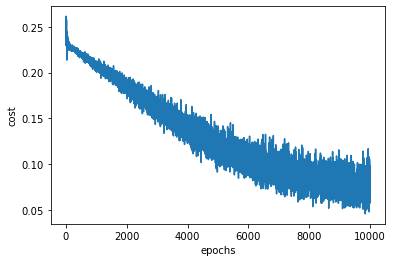

In [22]:
plot_cost()

In [23]:
def plot_accuracy():
    plt.figure()
    plt.plot(np.arange(len(accuracies)), accuracies)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

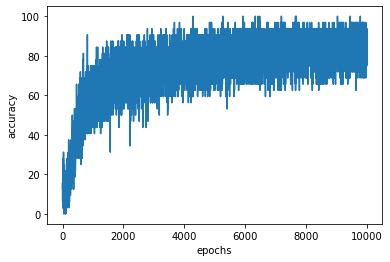

In [24]:
plot_accuracy()

In [27]:
n_costs = costs

In [28]:
cost = 0
avg_costs = []
iterations = []
for i in range(len(n_costs)):
    cost+= n_costs[i]
    if (i+1) % 100 == 0:
        cost /= 100
        avg_costs.append(cost)
        iterations.append((i+1)*10)

In [29]:
def plot_avg_cost():
    plt.figure()
    plt.plot(iterations, avg_costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.show()

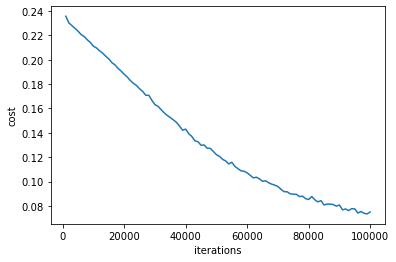

In [30]:
plot_avg_cost()

In [31]:
n_accuracies = accuracies

In [32]:
accuracy = 0
avg_accs = []
iterations = []
for i in range(len(n_accuracies)):
    accuracy+= n_accuracies[i]
    if (i+1) % 100 == 0:
        accuracy /= 100
        avg_accs.append(accuracy)
        iterations.append((i+1)*10)

In [33]:
def plot_avg_accuracy():
    plt.figure()
    plt.plot(iterations, avg_accs)
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.show()

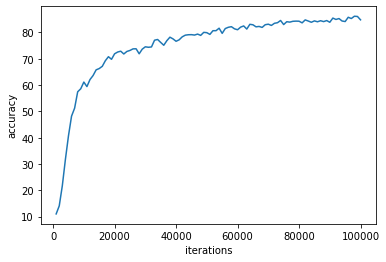

In [34]:
plot_avg_accuracy()